In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [161]:
# Reading the file NBA_Shot_Locations

In [162]:
data = pd.read_csv(r'C:\Users\simot\Documents\GitHub\DataScientest\NBA_Shot_Locations_1997_2020.csv')

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [164]:
# We place in a list the 20 players considered

In [165]:
PlayerList = ['Tim Duncan', 'Kobe Bryant', 'Allen Iverson', 'Steve Nash', 'Ray Allen', 'Paul Pierce', 'Pau Gasol', 'Tony Parker',
              'Manu Ginobili', 'Dwyane Wade', 'LeBron James', 'Chris Paul', 'Kevin Durant', 'Russell Westbrook', 'Stephen Curry', 
              'James Harden', 'Kawhi Leonard', 'Damian Lillard', 'Anthony Davis', 'Giannis Antetokounmpo']


In [166]:
# We restraint our data to the 20 players

In [167]:
data = data[ data['Player Name'].isin(PlayerList) ]

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350867 entries, 17033 to 4727908
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Game ID            350867 non-null  int64 
 1   Game Event ID      350867 non-null  int64 
 2   Player ID          350867 non-null  int64 
 3   Player Name        350867 non-null  object
 4   Team ID            350867 non-null  int64 
 5   Team Name          350867 non-null  object
 6   Period             350867 non-null  int64 
 7   Minutes Remaining  350867 non-null  int64 
 8   Seconds Remaining  350867 non-null  int64 
 9   Action Type        350867 non-null  object
 10  Shot Type          350867 non-null  object
 11  Shot Zone Basic    350867 non-null  object
 12  Shot Zone Area     350867 non-null  object
 13  Shot Zone Range    350867 non-null  object
 14  Shot Distance      350867 non-null  int64 
 15  X Location         350867 non-null  int64 
 16  Y Location     

In [169]:
data.head(10)

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
17033,29700010,31,1495,Tim Duncan,1610612759,San Antonio Spurs,1,8,47,Jump Shot,...,Right Side(R),16-24 ft.,16,154,53,0,19971031,DEN,SAS,Regular Season
17034,29700010,76,1495,Tim Duncan,1610612759,San Antonio Spurs,1,5,11,Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season
17035,29700010,87,1495,Tim Duncan,1610612759,San Antonio Spurs,1,4,4,Driving Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season
17036,29700010,226,1495,Tim Duncan,1610612759,San Antonio Spurs,2,3,35,Jump Shot,...,Left Side(L),8-16 ft.,11,-115,16,1,19971031,DEN,SAS,Regular Season
17037,29700010,287,1495,Tim Duncan,1610612759,San Antonio Spurs,3,10,59,Jump Shot,...,Center(C),Less Than 8 ft.,7,68,23,1,19971031,DEN,SAS,Regular Season
17038,29700010,333,1495,Tim Duncan,1610612759,San Antonio Spurs,3,5,45,Running Jump Shot,...,Center(C),Less Than 8 ft.,5,23,46,1,19971031,DEN,SAS,Regular Season
17039,29700010,458,1495,Tim Duncan,1610612759,San Antonio Spurs,4,5,54,Jump Shot,...,Center(C),8-16 ft.,9,18,98,1,19971031,DEN,SAS,Regular Season
17040,29700010,465,1495,Tim Duncan,1610612759,San Antonio Spurs,4,4,40,Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,0,19971031,DEN,SAS,Regular Season
17041,29700010,496,1495,Tim Duncan,1610612759,San Antonio Spurs,4,2,18,Jump Shot,...,Left Side(L),8-16 ft.,13,-139,3,0,19971031,DEN,SAS,Regular Season
17042,29700021,121,1495,Tim Duncan,1610612759,San Antonio Spurs,1,1,32,Jump Shot,...,Center(C),Less Than 8 ft.,6,-57,38,1,19971101,SAS,CLE,Regular Season


In [170]:
# We exclude certain columns not needed like Game ID, Game Event ID, ect...

In [171]:
data.drop(['Game ID', 'Game Event ID', 'Player ID', 'Team ID'], axis = 1, inplace = True)

In [172]:
#  We read the data file about the players specifically

In [173]:
player_data = pd.read_csv(r'C:\Users\simot\Documents\GitHub\DataScientest\player_data.csv')

In [174]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [175]:
# We only consider data about our 20 players

In [176]:
player_data = player_data[ player_data['name'].isin(PlayerList) ]

In [177]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 58 to 4290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        20 non-null     object 
 1   year_start  20 non-null     int64  
 2   year_end    20 non-null     int64  
 3   position    20 non-null     object 
 4   height      20 non-null     object 
 5   weight      20 non-null     float64
 6   birth_date  20 non-null     object 
 7   college     14 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ KB


In [178]:
player_data.head(20)

,name,year_start,year_end,position,height,weight,birth_date,college
58,Ray Allen,1997,2014,G,6-5,205.0,"July 20, 1975",University of Connecticut
105,Giannis Antetokounmpo,2014,2018,F-G,6-11,222.0,"December 6, 1994",NaN
528,Kobe Bryant,1997,2016,G-F,6-6,212.0,"August 23, 1978",NaN
868,Stephen Curry,2010,2018,G,6-3,190.0,"March 14, 1988",Davidson College
901,Anthony Davis,2013,2018,F-C,6-10,253.0,"March 11, 1993",University of Kentucky
1078,Tim Duncan,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University
1085,Kevin Durant,2008,2018,F-G,6-9,240.0,"September 29, 1988",University of Texas at Austin
1383,Pau Gasol,2002,2018,F-C,7-0,250.0,"July 6, 1980",NaN
1425,Manu Ginobili,2003,2018,G,6-6,205.0,"July 28, 1977",NaN
1627,James Harden,2010,2018,G,6-5,220.0,"August 26, 1989",Arizona State University


In [179]:
# We want to extract the age of the player when the game was played

In [180]:
player_data['birth_year'] = player_data['birth_date'].str[-4:]

In [181]:
player_data.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year
58,Ray Allen,1997,2014,G,6-5,205.0,"July 20, 1975",University of Connecticut,1975
105,Giannis Antetokounmpo,2014,2018,F-G,6-11,222.0,"December 6, 1994",NaN,1994
528,Kobe Bryant,1997,2016,G-F,6-6,212.0,"August 23, 1978",NaN,1978
868,Stephen Curry,2010,2018,G,6-3,190.0,"March 14, 1988",Davidson College,1988
901,Anthony Davis,2013,2018,F-C,6-10,253.0,"March 11, 1993",University of Kentucky,1993


In [182]:
data['Year_Game_Date'] = data['Game Date'].astype(str).str[:4]

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350867 entries, 17033 to 4727908
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Player Name        350867 non-null  object
 1   Team Name          350867 non-null  object
 2   Period             350867 non-null  int64 
 3   Minutes Remaining  350867 non-null  int64 
 4   Seconds Remaining  350867 non-null  int64 
 5   Action Type        350867 non-null  object
 6   Shot Type          350867 non-null  object
 7   Shot Zone Basic    350867 non-null  object
 8   Shot Zone Area     350867 non-null  object
 9   Shot Zone Range    350867 non-null  object
 10  Shot Distance      350867 non-null  int64 
 11  X Location         350867 non-null  int64 
 12  Y Location         350867 non-null  int64 
 13  Shot Made Flag     350867 non-null  int64 
 14  Game Date          350867 non-null  int64 
 15  Home Team          350867 non-null  object
 16  Away Team      

In [184]:
data.drop(['Game Date'], axis =1, inplace = True )

In [185]:
data.rename(columns = {'Player Name':'Name'}, inplace = True)

In [186]:
player_data.rename(columns = {'name':'Name'}, inplace = True)

In [187]:
# We merge the NBA shoot data with the data specific to the players. 

In [188]:
joint_data = pd.merge(data, player_data, on ='Name', how ='inner')

In [189]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350867 entries, 0 to 350866
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               350867 non-null  object 
 1   Team Name          350867 non-null  object 
 2   Period             350867 non-null  int64  
 3   Minutes Remaining  350867 non-null  int64  
 4   Seconds Remaining  350867 non-null  int64  
 5   Action Type        350867 non-null  object 
 6   Shot Type          350867 non-null  object 
 7   Shot Zone Basic    350867 non-null  object 
 8   Shot Zone Area     350867 non-null  object 
 9   Shot Zone Range    350867 non-null  object 
 10  Shot Distance      350867 non-null  int64  
 11  X Location         350867 non-null  int64  
 12  Y Location         350867 non-null  int64  
 13  Shot Made Flag     350867 non-null  int64  
 14  Home Team          350867 non-null  object 
 15  Away Team          350867 non-null  object 
 16  Se

In [190]:
joint_data.head(5)

,Name,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,...,Season Type,Year_Game_Date,year_start,year_end,position,height,weight,birth_date,college,birth_year
0,Tim Duncan,San Antonio Spurs,1,8,47,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
1,Tim Duncan,San Antonio Spurs,1,5,11,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
2,Tim Duncan,San Antonio Spurs,1,4,4,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
3,Tim Duncan,San Antonio Spurs,2,3,35,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
4,Tim Duncan,San Antonio Spurs,3,10,59,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976


In [191]:
# what age was the player when the game was played

In [192]:
joint_data['Age_At_Game']=joint_data['Year_Game_Date'].astype(int)-joint_data['birth_year'].astype(int)

In [193]:
# how many years of experience in NBA had the player when the game was played

In [194]:
joint_data['Years_Experience']= joint_data['Year_Game_Date'].astype(int)-joint_data['year_start'].astype(int)

In [195]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350867 entries, 0 to 350866
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               350867 non-null  object 
 1   Team Name          350867 non-null  object 
 2   Period             350867 non-null  int64  
 3   Minutes Remaining  350867 non-null  int64  
 4   Seconds Remaining  350867 non-null  int64  
 5   Action Type        350867 non-null  object 
 6   Shot Type          350867 non-null  object 
 7   Shot Zone Basic    350867 non-null  object 
 8   Shot Zone Area     350867 non-null  object 
 9   Shot Zone Range    350867 non-null  object 
 10  Shot Distance      350867 non-null  int64  
 11  X Location         350867 non-null  int64  
 12  Y Location         350867 non-null  int64  
 13  Shot Made Flag     350867 non-null  int64  
 14  Home Team          350867 non-null  object 
 15  Away Team          350867 non-null  object 
 16  Se

In [196]:
joint_data.head(5)

,Name,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,...,year_start,year_end,position,height,weight,birth_date,college,birth_year,Age_At_Game,Years_Experience
0,Tim Duncan,San Antonio Spurs,1,8,47,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
1,Tim Duncan,San Antonio Spurs,1,5,11,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
2,Tim Duncan,San Antonio Spurs,1,4,4,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
3,Tim Duncan,San Antonio Spurs,2,3,35,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
4,Tim Duncan,San Antonio Spurs,3,10,59,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1


In [197]:
# We drop a few columns we do not need

In [198]:
joint_data.drop([ 'Year_Game_Date','year_start', 'year_end', 'birth_date', 'college', 'birth_year'], axis =1, inplace = True )

In [199]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350867 entries, 0 to 350866
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               350867 non-null  object 
 1   Team Name          350867 non-null  object 
 2   Period             350867 non-null  int64  
 3   Minutes Remaining  350867 non-null  int64  
 4   Seconds Remaining  350867 non-null  int64  
 5   Action Type        350867 non-null  object 
 6   Shot Type          350867 non-null  object 
 7   Shot Zone Basic    350867 non-null  object 
 8   Shot Zone Area     350867 non-null  object 
 9   Shot Zone Range    350867 non-null  object 
 10  Shot Distance      350867 non-null  int64  
 11  X Location         350867 non-null  int64  
 12  Y Location         350867 non-null  int64  
 13  Shot Made Flag     350867 non-null  int64  
 14  Home Team          350867 non-null  object 
 15  Away Team          350867 non-null  object 
 16  Se

In [200]:
## We start analysing parameters and variables 

In [201]:
### What are the relevant variables which can influence a shot?


In [202]:
total_shots = joint_data.groupby(['Name'])['Shot Made Flag'].sum()

In [203]:
PlayerList.sort()

In [204]:
PlayerList

['Allen Iverson',
 'Anthony Davis',
 'Chris Paul',
 'Damian Lillard',
 'Dwyane Wade',
 'Giannis Antetokounmpo',
 'James Harden',
 'Kawhi Leonard',
 'Kevin Durant',
 'Kobe Bryant',
 'LeBron James',
 'Manu Ginobili',
 'Pau Gasol',
 'Paul Pierce',
 'Ray Allen',
 'Russell Westbrook',
 'Stephen Curry',
 'Steve Nash',
 'Tim Duncan',
 'Tony Parker']

<BarContainer object of 20 artists>

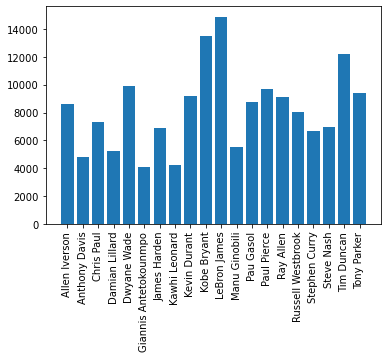

In [205]:
plt.xticks(rotation='vertical')
plt.bar(PlayerList, total_shots)

In [206]:
# Checking if the age of the player has an influence on the 

In [210]:
total_shots_age = joint_data.groupby(['Age_At_Game'])['Shot Made Flag'].sum()

In [211]:
total_shots_age

Age_At_Game
19      875
20     3052
21     5904
22     9502
23    11490
24    13208
25    13119
26    12457
27    11755
28    13222
29    11618
30    12066
31    10065
32     7748
33     7071
34     6434
35     4944
36     3887
37     2884
38     2177
39     1146
40      392
41      123
Name: Shot Made Flag, dtype: int64

In [212]:
## l'age ideal pour marquer des points se situe entre 23 et 31 ans!! le facteur age semble une variable importante

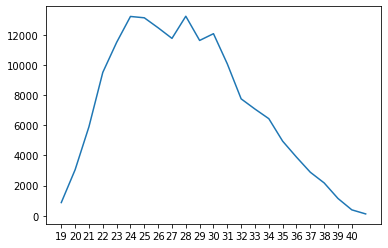

In [221]:
x_ticks = np.arange(19, 41, 1)
plt.xticks(x_ticks)
plt.plot(total_shots_age)

In [222]:
total_shots_experience = joint_data.groupby(['Years_Experience'])['Shot Made Flag'].sum()

In [223]:
total_shots_experience

Years_Experience
-1      2081
 0      7961
 1     10487
 2     12004
 3     13755
 4     14077
 5     14389
 6     12926
 7     11493
 8     11399
 9     10754
 10     9646
 11     7848
 12     6740
 13     6240
 14     4901
 15     4172
 16     2628
 17     1075
 18      335
 19      228
Name: Shot Made Flag, dtype: int64

In [ ]:
# Years_Experience in NBA seems also relevant.  We have the more scores when the players have been playing in the NBA between 3 years and 8years..


In [ ]:
# Does height matter ?

In [224]:
total_shots_height = joint_data.groupby(['height'])['Shot Made Flag'].sum()

In [225]:
total_shots_height

height
6-0     15928
6-10     4814
6-11    16332
6-2      9390
6-3     26928
6-4      9904
6-5     16000
6-6     19073
6-7     13920
6-8     14881
6-9      9177
7-0      8792
Name: Shot Made Flag, dtype: int64

In [ ]:
# the height doesnt seem to matter

In [ ]:
# Does weight matter ?

In [226]:
total_shots_weight = joint_data.groupby(['weight'])['Shot Made Flag'].sum()

In [227]:
total_shots_weight

weight
165.0     8597
175.0     7331
185.0     9390
190.0     6659
195.0    12215
200.0     8054
205.0    14644
212.0    13534
220.0    16799
222.0     4094
230.0     4231
235.0     9689
240.0     9177
250.0    35911
253.0     4814
Name: Shot Made Flag, dtype: int64

In [228]:
# weight doesnt seem to matter either

In [ ]:
## what type of action scores the most ?

In [238]:
total_shots_action = joint_data.groupby(['Action Type'])['Shot Made Flag'].sum().sort_values(ascending=False)

In [240]:
total_shots_action.head(20)

Action Type
Jump Shot                         60258
Driving Layup Shot                20618
Layup Shot                        17260
Pullup Jump shot                   9321
Running Jump Shot                  4747
Dunk Shot                          4525
Fadeaway Jump Shot                 4263
Step Back Jump shot                3828
Turnaround Jump Shot               3399
Driving Dunk Shot                  2985
Driving Finger Roll Layup Shot     2498
Jump Bank Shot                     2490
Running Layup Shot                 2163
Floating Jump shot                 2123
Reverse Layup Shot                 2018
Slam Dunk Shot                     2013
Alley Oop Dunk Shot                1565
Hook Shot                          1495
Turnaround Fadeaway shot           1466
Tip Shot                           1291
Name: Shot Made Flag, dtype: int64

In [ ]:
### Above are the action types giving the most points. This might be relevant in the future

In [245]:
total_shots_season = joint_data.groupby(['Season Type'])['Shot Made Flag'].sum()

In [244]:
total_shots_season

Season Type
Playoffs          0.460874
Regular Season    0.472126
Name: Shot Made Flag, dtype: float64

In [246]:
total_shots_season2 = joint_data.groupby(['Season Type'])['Shot Made Flag'].mean()

In [247]:
total_shots_season2

Season Type
Playoffs          0.460874
Regular Season    0.472126
Name: Shot Made Flag, dtype: float64

In [248]:
### there doesnt seem to be much difference with season type

In [254]:
total_shots_distance = joint_data.groupby(['Shot Distance'])['Shot Made Flag'].sum()

In [255]:
total_shots_distance.head(20)

Shot Distance
0     36888
1     18012
2      9478
3      3514
4      3031
5      3140
6      3274
7      3237
8      3187
9      2873
10     2637
11     2835
12     3069
13     3378
14     4035
15     4596
16     5346
17     5622
18     5493
19     4913
Name: Shot Made Flag, dtype: int64

In [256]:
### Obviously the Shot Distance is a huge factor